## Conclusiones

Este proyecto se centra en explorar la efectividad y la aplicabilidad de los algoritmos de Machine Learning en la creación de estrategias de trading. Aprovechando los avances en aprendizaje automático, se embarca en un análisis exhaustivo con el objetivo de maximizar la rentabilidad y el rendimiento mediante la implementación y ajuste fino de diversas estrategias.

El proyecto examina la eficacia de estos algoritmos al desglosar y comparar múltiples estrategias, entre ellas:

1. **Regresión Logística (Logistic Regression)**: Un método de clasificación que utiliza la función logística para modelar la probabilidad de una clase particular. Se adapta bien a problemas de clasificación binaria y es útil para identificar puntos de entrada y salida en el mercado.

2. **SVC (Support Vector Classifier)**: Un algoritmo de clasificación que busca encontrar el hiperplano óptimo que mejor separa las clases en un espacio de características. Es eficaz en la identificación de patrones complejos en los datos y puede ser utilizado para generar señales de compra y venta.

3. **XGBoost**: Un algoritmo de aprendizaje supervisado que utiliza un conjunto de árboles de decisión para realizar predicciones. XGBoost es conocido por su eficacia en la gestión de conjuntos de datos grandes y complejos, y puede ser utilizado para mejorar la precisión de las señales de trading.

A través de un análisis comparativo profundo, el proyecto busca descubrir información detallada sobre las estrategias de trading. Examina la capacidad de los modelos para adaptarse a los cambios del mercado, mitigar riesgos y maximizar los retornos.

La documentación del proyecto comprende una investigación exhaustiva de múltiples estrategias, proporcionando una visión completa de sus fortalezas, debilidades y aplicaciones potenciales en escenarios de trading reales. Además, se busca ofrecer un informe claro y completo que detalle el proceso, descubrimientos e ideas obtenidos durante esta exploración rigurosa.

## Importar

In [3]:

from DL.main import perform, perform_validation

import pandas as pd
import optuna
import matplotlib.pyplot as plt

commission_value = 0.0025
take_profit_value = 0.05
stop_loss_value = 0.05

# 1 Dia

In [4]:
# Preprocesamiento de tus datos
data = pd.read_csv('data/aapl_1d_train.csv')
data_validation = pd.read_csv('data/aapl_1d_test.csv')

data['Timestamp'] = pd.to_datetime(data['Date'])
data_validation['Timestamp'] = pd.to_datetime(data_validation['Date'])

In [5]:
df_results, strategy_dfs, combined_values_df, model_params = perform(data=data, commission= 0.001, stop_loss = 0.05, take_profit = 0.05)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (m

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step


In [6]:
df_results

,gain,strategy,orders_executed
0,1.426406e+06,['lr'],8560.0
1,1.426406e+06,['svc'],8560.0
2,1.426406e+06,['xgboost'],8560.0
3,1.926372e+06,['dl'],5260.0
4,1.426406e+06,"['lr', 'svc']",8560.0
5,1.426406e+06,"['lr', 'xgboost']",8560.0
6,1.926372e+06,"['lr', 'dl']",5260.0
7,1.426406e+06,"['svc', 'xgboost']",8560.0
8,5.000334e+05,"['svc', 'dl']",3300.0
9,5.000334e+05,"['xgboost', 'dl']",3300.0


In [7]:
combined_values_df.head()

,['lr'],['svc'],['xgboost'],['dl'],"['lr', 'svc']","['lr', 'xgboost']","['lr', 'dl']","['svc', 'xgboost']","['svc', 'dl']","['xgboost', 'dl']","['lr', 'svc', 'xgboost']","['lr', 'svc', 'dl']","['lr', 'xgboost', 'dl']","['svc', 'xgboost', 'dl']","['lr', 'svc', 'xgboost', 'dl']"
14,999999.468728,999999.468728,999999.468728,999978.178764,999999.468728,999999.468728,999978.178764,999999.468728,1000021.289964,1000021.289964,999999.468728,999978.178764,999978.178764,1000021.289964,999978.178764
15,1000010.861536,1000010.861536,1000010.861536,1000096.121568,1000010.861536,1000010.861536,1000096.121568,1000010.861536,999914.739968,999914.739968,1000010.861536,1000096.121568,1000096.121568,999914.739968,1000096.121568
16,1000010.310608,1000010.310608,1000010.310608,1000206.031704,1000010.310608,1000010.310608,1000206.031704,1000010.310608,999804.278904,999804.278904,1000010.310608,1000206.031704,1000206.031704,999804.278904,1000206.031704
17,1000009.760632,1000009.760632,1000009.760632,1000315.751916,1000009.760632,1000009.760632,1000315.751916,1000009.760632,999694.008716,999694.008716,1000009.760632,1000315.751916,1000315.751916,999694.008716,1000315.751916
18,999992.477856,999992.477856,999992.477856,1000408.739328,999992.477856,999992.477856,1000408.739328,999992.477856,999583.738528,999583.738528,999992.477856,1000408.739328,1000408.739328,999583.738528,1000408.739328


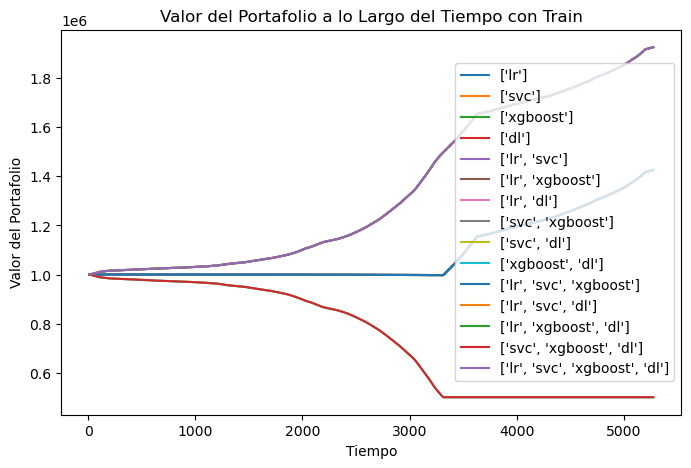

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(combined_values_df, label='Valor del Portafolio')
plt.title(f"Valor del Portafolio a lo Largo del Tiempo con Train")
plt.xlabel('Tiempo')
plt.ylabel('Valor del Portafolio')
plt.legend(combined_values_df.columns)
plt.show()

## Test

In [9]:
df_results, strategy_dfs, combined_values_df = perform_validation(data=data_validation, commission= 0.001, stop_loss = 0.05, take_profit = 0.05, model_params= model_params)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step


In [10]:
df_results

,gain,strategy,orders_executed
0,9.994415e+05,['lr'],1458.0
1,9.994415e+05,['svc'],1458.0
2,9.994415e+05,['xgboost'],1458.0
3,8.861650e+05,['dl'],729.0
4,9.994415e+05,"['lr', 'svc']",1458.0
5,9.994415e+05,"['lr', 'xgboost']",1458.0
6,1.113276e+06,"['lr', 'dl']",729.0
7,9.994415e+05,"['svc', 'xgboost']",1458.0
8,8.861650e+05,"['svc', 'dl']",729.0
9,1.113276e+06,"['xgboost', 'dl']",729.0


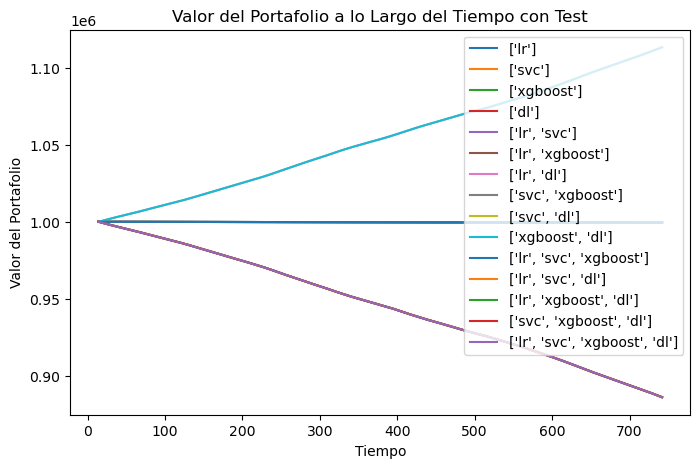

In [11]:
plt.figure(figsize=(8, 5))
plt.plot(combined_values_df, label='Valor del Portafolio')
plt.title(f"Valor del Portafolio a lo Largo del Tiempo con Test")
plt.xlabel('Tiempo')
plt.ylabel('Valor del Portafolio')
plt.legend(combined_values_df.columns)
plt.show()

# 1 Hora

In [12]:
# Preprocesamiento de tus datos
data = pd.read_csv('data/aapl_1h_train.csv')
data_validation = pd.read_csv('data/aapl_1h_test.csv')

data['Timestamp'] = pd.to_datetime(data['Datetime'])
data_validation['Timestamp'] = pd.to_datetime(data_validation['Datetime'])

In [13]:
df_results, strategy_dfs, combined_values_df, model_params = perform(data=data, commission= 0.001, stop_loss = 0.05, take_profit = 0.05)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (m

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [14]:
df_results

,gain,strategy,orders_executed
0,9.997936e+05,['lr'],682.0
1,9.997936e+05,['svc'],682.0
2,9.997936e+05,['xgboost'],682.0
3,9.587528e+05,['dl'],341.0
4,9.997936e+05,"['lr', 'svc']",682.0
5,9.997936e+05,"['lr', 'xgboost']",682.0
6,9.587528e+05,"['lr', 'dl']",341.0
7,9.997936e+05,"['svc', 'xgboost']",682.0
8,1.041041e+06,"['svc', 'dl']",341.0
9,1.000000e+06,"['xgboost', 'dl']",0.0


In [15]:
combined_values_df.head()

,['lr'],['svc'],['xgboost'],['dl'],"['lr', 'svc']","['lr', 'xgboost']","['lr', 'dl']","['svc', 'xgboost']","['svc', 'dl']","['xgboost', 'dl']","['lr', 'svc', 'xgboost']","['lr', 'svc', 'dl']","['lr', 'xgboost', 'dl']","['svc', 'xgboost', 'dl']","['lr', 'svc', 'xgboost', 'dl']"
14,999999.39155,999999.39155,999999.39155,1000012.465878,999999.39155,999999.39155,1000012.465878,999999.39155,999986.925672,1000000,999999.39155,1000012.465878,1000012.465878,1000012.465878,1000012.465878
15,999998.78355,999998.78355,999998.78355,999890.56188,999998.78355,999998.78355,999890.56188,999998.78355,1000108.22167,1000000,999998.78355,999890.56188,999890.56188,999890.56188,999890.56188
16,999998.182312,999998.182312,999998.182312,999770.013558,999998.182312,999998.182312,999770.013558,999998.182312,1000228.168754,1000000,999998.182312,999770.013558,999770.013558,999770.013558,999770.013558
17,999997.581612,999997.581612,999997.581612,999649.573209,999997.581612,999997.581612,999649.573209,999997.581612,1000348.008403,1000000,999997.581612,999649.573209,999649.573209,999649.573209,999649.573209
18,999996.977412,999996.977412,999996.977412,999528.431113,999996.977412,999996.977412,999528.431113,999996.977412,1000468.546299,1000000,999996.977412,999528.431113,999528.431113,999528.431113,999528.431113


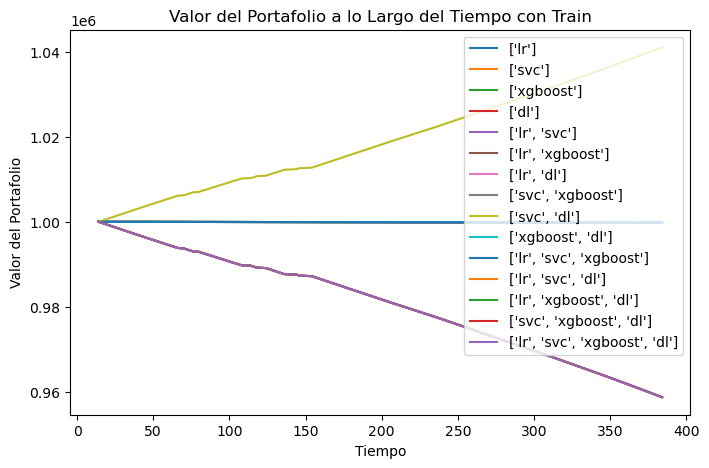

In [16]:
plt.figure(figsize=(8, 5))
plt.plot(combined_values_df, label='Valor del Portafolio')
plt.title(f"Valor del Portafolio a lo Largo del Tiempo con Train")
plt.xlabel('Tiempo')
plt.ylabel('Valor del Portafolio')
plt.legend(combined_values_df.columns)
plt.show()

## Test

In [17]:
df_results, strategy_dfs, combined_values_df = perform_validation(data=data_validation, commission= 0.001, stop_loss = 0.05, take_profit = 0.05, model_params= model_params)

164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step


In [18]:
df_results

,gain,strategy,orders_executed
0,1.315244e+06,['lr'],8600.0
1,1.315244e+06,['svc'],8600.0
2,1.315244e+06,['xgboost'],8600.0
3,1.815228e+06,['dl'],5239.0
4,1.315244e+06,"['lr', 'svc']",8600.0
5,1.315244e+06,"['lr', 'xgboost']",8600.0
6,5.000165e+05,"['lr', 'dl']",3361.0
7,1.315244e+06,"['svc', 'xgboost']",8600.0
8,5.000165e+05,"['svc', 'dl']",3361.0
9,1.815228e+06,"['xgboost', 'dl']",5239.0


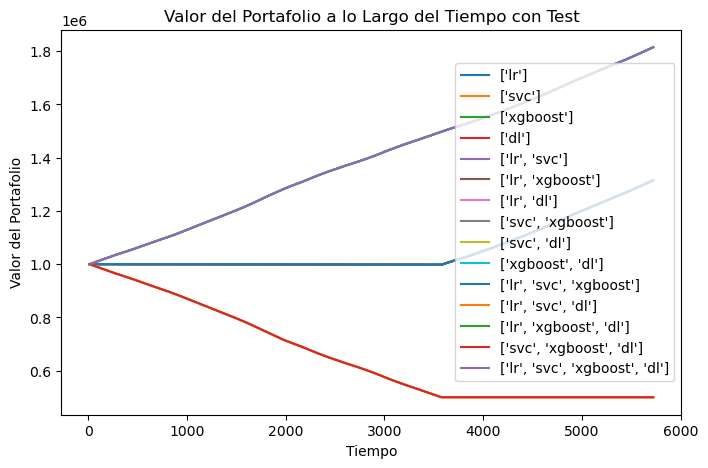

In [19]:
plt.figure(figsize=(8, 5))
plt.plot(combined_values_df, label='Valor del Portafolio')
plt.title(f"Valor del Portafolio a lo Largo del Tiempo con Test")
plt.xlabel('Tiempo')
plt.ylabel('Valor del Portafolio')
plt.legend(combined_values_df.columns)
plt.show()

# 5 Min

In [20]:
# Preprocesamiento de tus datos
data = pd.read_csv('data/aapl_5m_train.csv')
data_validation = pd.read_csv('data/aapl_5m_test.csv')

data['Timestamp'] = pd.to_datetime(data['Datetime'])
data_validation['Timestamp'] = pd.to_datetime(data_validation['Datetime'])

## Train

In [21]:
df_results, strategy_dfs, combined_values_df, model_params = perform(data=data, commission= 0.001, stop_loss = 0.05, take_profit = 0.05)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (m

1223/1223 ━━━━━━━━━━━━━━━━━━━━ 0s 189us/step
1223/1223 ━━━━━━━━━━━━━━━━━━━━ 0s 188us/step
1223/1223 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step
1223/1223 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step
1223/1223 ━━━━━━━━━━━━━━━━━━━━ 0s 188us/step
1223/1223 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step
1223/1223 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
1223/1223 ━━━━━━━━━━━━━━━━━━━━ 0s 175us/step


In [22]:
df_results

,gain,strategy,orders_executed
0,6.272753e+06,['lr'],42970.0
1,6.272753e+06,['svc'],42970.0
2,6.272753e+06,['xgboost'],42970.0
3,1.053573e+06,['dl'],7522.0
4,6.272753e+06,"['lr', 'svc']",42970.0
5,6.272753e+06,"['lr', 'xgboost']",42970.0
6,9.873663e+05,"['lr', 'dl']",95.0
7,6.272753e+06,"['svc', 'xgboost']",42970.0
8,8.494207e+05,"['svc', 'dl']",1052.0
9,1.000000e+06,"['xgboost', 'dl']",0.0


In [23]:
combined_values_df.head()

,['lr'],['svc'],['xgboost'],['dl'],"['lr', 'svc']","['lr', 'xgboost']","['lr', 'dl']","['svc', 'xgboost']","['svc', 'dl']","['xgboost', 'dl']","['lr', 'svc', 'xgboost']","['lr', 'svc', 'dl']","['lr', 'xgboost', 'dl']","['svc', 'xgboost', 'dl']","['lr', 'svc', 'xgboost', 'dl']"
14,999999.344775,999999.344775,999999.344775,999997.598596,999999.344775,999999.344775,1000000,999999.344775,1000000,1000000,999999.344775,1000000,1000001.74618,1000000,1000001.74618
15,999998.691026,999998.691026,999998.691026,999866.521828,999998.691026,999998.691026,1000000,999998.691026,1000000,1000000,999998.691026,1000000,1000132.169198,1000000,1000132.169198
16,999998.037477,999998.037477,999998.037477,999735.48526,999998.037477,999998.037477,1000000,999998.037477,1000000,1000000,999998.037477,1000000,1000262.552216,1000000,1000262.552216
17,999997.382477,999997.382477,999997.382477,999604.15776,999997.382477,999997.382477,1000000,999997.382477,1000000,1000000,999997.382477,1000000,1000393.224716,1000000,1000393.224716
18,999996.730927,999996.730927,999996.730927,999473.521988,999996.730927,999996.730927,1000000,999996.730927,1000000,1000000,999996.730927,1000000,1000523.208938,1000000,1000523.208938


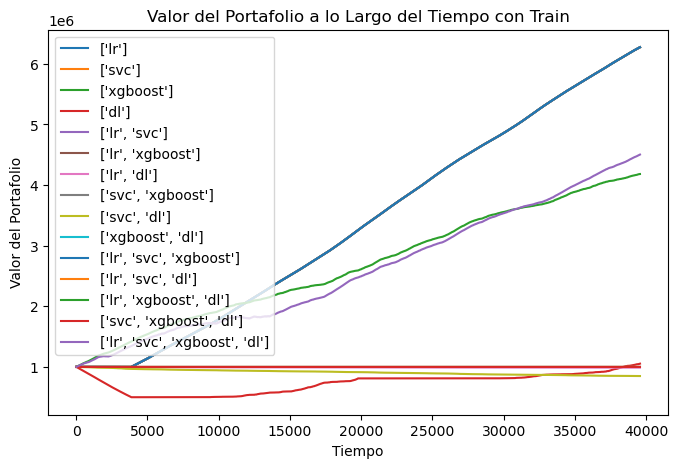

In [24]:
plt.figure(figsize=(8, 5))
plt.plot(combined_values_df, label='Valor del Portafolio')
plt.title(f"Valor del Portafolio a lo Largo del Tiempo con Train")
plt.xlabel('Tiempo')
plt.ylabel('Valor del Portafolio')
plt.legend(combined_values_df.columns)
plt.show()

## Test

In [25]:
data_validation = data_validation.head(120)

In [26]:
df_results, strategy_dfs, combined_values_df = perform_validation(data=data_validation, commission= 0.001, stop_loss = 0.05, take_profit = 0.05, model_params= model_params)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/stepWARNING:tensorflow:6 out of the last 1229 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x2a1e4b4c0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3/3 ━━━━━━━━━

In [27]:
df_results

,gain,strategy,orders_executed
0,999940.414740,['lr'],190.0
1,999940.414740,['svc'],190.0
2,999940.414740,['xgboost'],190.0
3,988181.135427,['dl'],95.0
4,999940.414740,"['lr', 'svc']",190.0
5,999940.414740,"['lr', 'xgboost']",190.0
6,1000000.000000,"['lr', 'dl']",0.0
7,999940.414740,"['svc', 'xgboost']",190.0
8,1000000.000000,"['svc', 'dl']",0.0
9,1000000.000000,"['xgboost', 'dl']",0.0


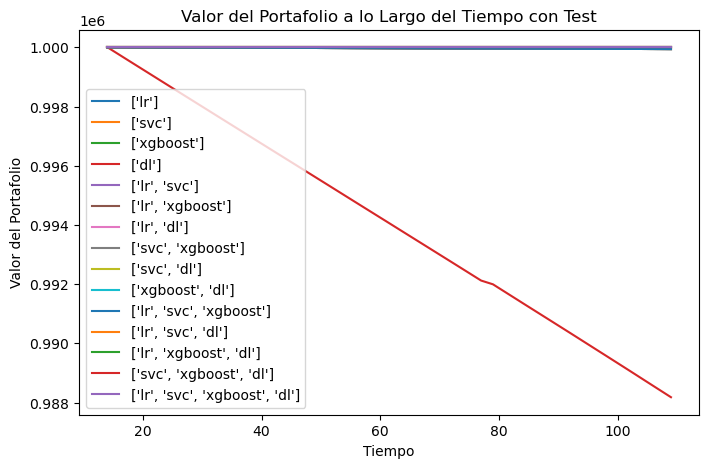

In [28]:
plt.figure(figsize=(8, 5))
plt.plot(combined_values_df, label='Valor del Portafolio')
plt.title(f"Valor del Portafolio a lo Largo del Tiempo con Test")
plt.xlabel('Tiempo')
plt.ylabel('Valor del Portafolio')
plt.legend(combined_values_df.columns)
plt.show()

# 1 Min

In [29]:
# Preprocesamiento de tus datos
data = pd.read_csv('data/aapl_1m_train.csv')
data_validation = pd.read_csv('data/aapl_1m_test.csv')

## Train

In [ ]:
df_results, strategy_dfs, combined_values_df, model_params = perform(data=data, commission= 0.001, stop_loss = 0.05, take_profit = 0.05)


In [ ]:
df_results

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(combined_values_df, label='Valor del Portafolio')
plt.title(f"Valor del Portafolio a lo Largo del Tiempo con Train")
plt.xlabel('Tiempo')
plt.ylabel('Valor del Portafolio')
plt.legend(combined_values_df.columns)
plt.show()

## Test

In [ ]:
df_results, strategy_dfs, combined_values_df = perform_validation(data=data_validation, commission= 0.001, stop_loss = 0.05, take_profit = 0.05, model_params= model_params)

In [ ]:
df_results

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(combined_values_df, label='Valor del Portafolio')
plt.title(f"Valor del Portafolio a lo Largo del Tiempo con Test")
plt.xlabel('Tiempo')
plt.ylabel('Valor del Portafolio')
plt.legend(combined_values_df.columns)
plt.show()